In [1]:
import torch
import numpy as np
import toydiff as tdf
import matplotlib.pyplot as plt

------

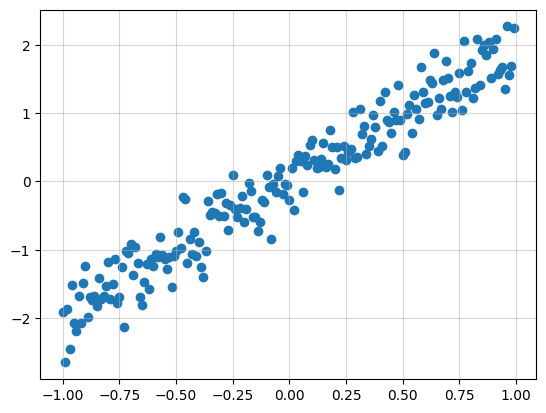

In [2]:
x = np.arange(-1, 1, 0.01)
y = 2 * x + np.random.normal(size=len(x), scale=0.3)

x = x.reshape(-1,1)
y = y.reshape(-1,1)

fig, ax = plt.subplots(1,1)
ax.scatter(x, y)
ax.grid(True, alpha=0.5);

In [3]:
model = tdf.nn.blocks.Linear(1, 1, bias=False)

In [4]:
feat = tdf.Tensor(x, track_gradient=True)
labels = tdf.Tensor(y, track_gradient=True)

In [5]:
from toydiff.nn.optim import SGD
from toydiff.nn.functional import mse_loss

In [6]:
optimizer = SGD(model)

In [7]:
model.weights

Tensor([[0.28155714]], dtype=float32, track_gradient=True)

In [8]:
# original prediction
y_0 = model(feat).numpy()

In [9]:
# we want to minimize the sum of squares
losses = []
for i in range(15_000):
    optimizer.zero_grad()

    out = model(feat)
    loss = mse_loss(out, labels)
    loss.backward()
    
    optimizer.step()
    
    losses.append(loss.value)

/Users/alejandroperezsanjuan/Git/toydiff/src/toydiff/core.py:619: RuntimeWarning: invalid value encountered in log
  grad_b = (self.power * np.log(data_a)) * grad_np


In [10]:
model.weights

Tensor([[1.8892651]], dtype=float32, track_gradient=True)

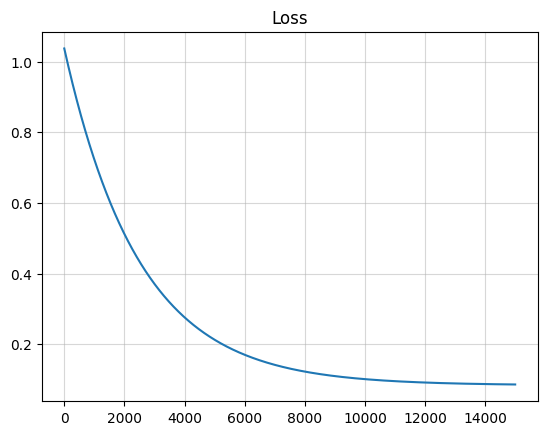

In [11]:
fig, ax = plt.subplots(1,1)

ax.plot(losses)
ax.grid(True, alpha=0.5)
ax.set_title("Loss");

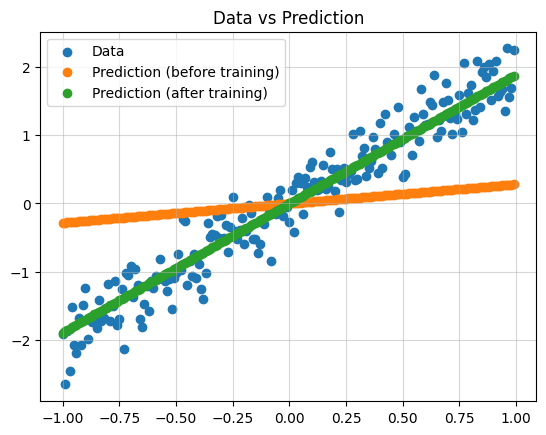

In [12]:
fig, ax = plt.subplots(1,1)

ax.scatter(x, y)
ax.scatter(x, y_0)
ax.scatter(x, out.numpy())

ax.grid(True, alpha=0.5)
ax.legend(["Data", "Prediction (before training)", "Prediction (after training)"])
ax.set_title("Data vs Prediction");

-----